In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [2]:
chicago_df1 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)
chicago_df2 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False)
chicago_df3 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False)

b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [3]:
chicago_df1.shape

(1872343, 23)

In [4]:
chicago_df2.shape

(2688710, 23)

In [5]:
chicago_df3.shape

(1456714, 23)

In [6]:
chicago_df = pd.concat([chicago_df1, chicago_df2, chicago_df3])
chicago_df.shape

(6017767, 23)

# Visualizing Null Values

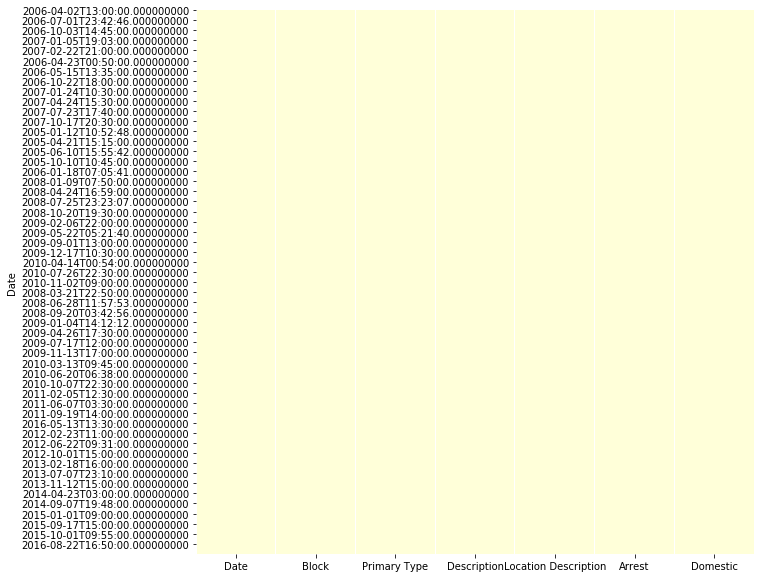

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(chicago_df.isnull(),cbar=False, cmap='YlGnBu')

# Dropping unwanted columns

In [8]:
chicago_df.drop(['Unnamed: 0','Case Number', 'ID','IUCR','X Coordinate','Y Coordinate','Updated On','FBI Code','Beat', 'Ward','Community Area','Location', 'District','Latitude','Longitude', 'Year'], axis = 1, inplace = True)

In [9]:
chicago_df.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,04/02/2006 01:00:00 PM,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
1,02/26/2006 01:40:48 PM,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2,01/08/2006 11:16:00 PM,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
3,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
4,02/17/2006 09:03:14 PM,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False


# Changing Datetime format and setting Date as index

In [10]:
chicago_df.Date = pd.to_datetime(chicago_df.Date, format='%m/%d/%Y %I:%M:%S %p')
chicago_df.index = pd.DatetimeIndex(chicago_df['Date'])

# Visualizing from different perspectives

In [11]:
order_data = chicago_df['Primary Type'].value_counts().iloc[:15].index

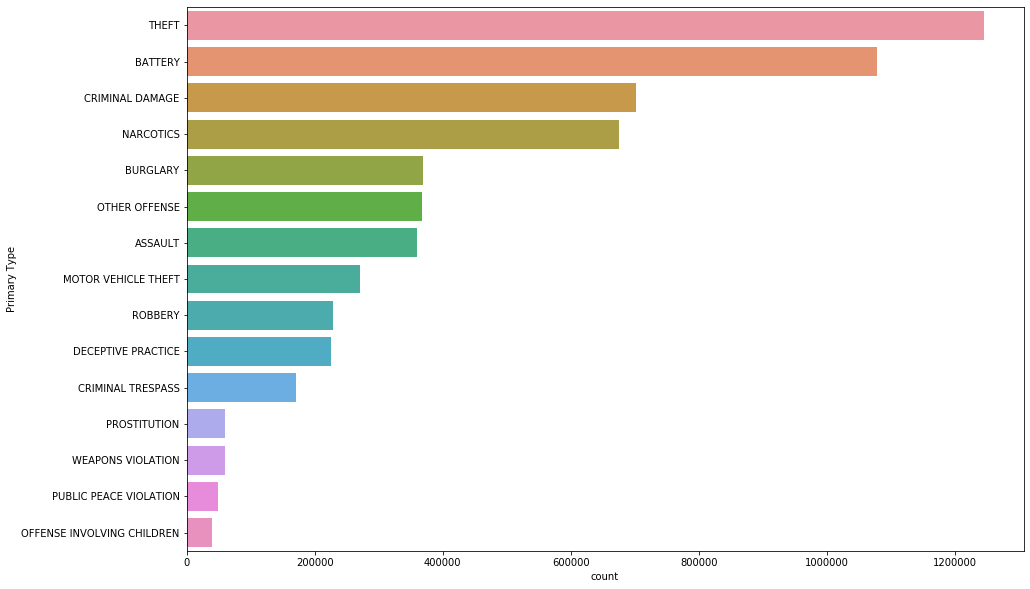

In [12]:
plt.figure(figsize = (15,10))
sns.countplot(y='Primary Type', data = chicago_df, order = order_data)

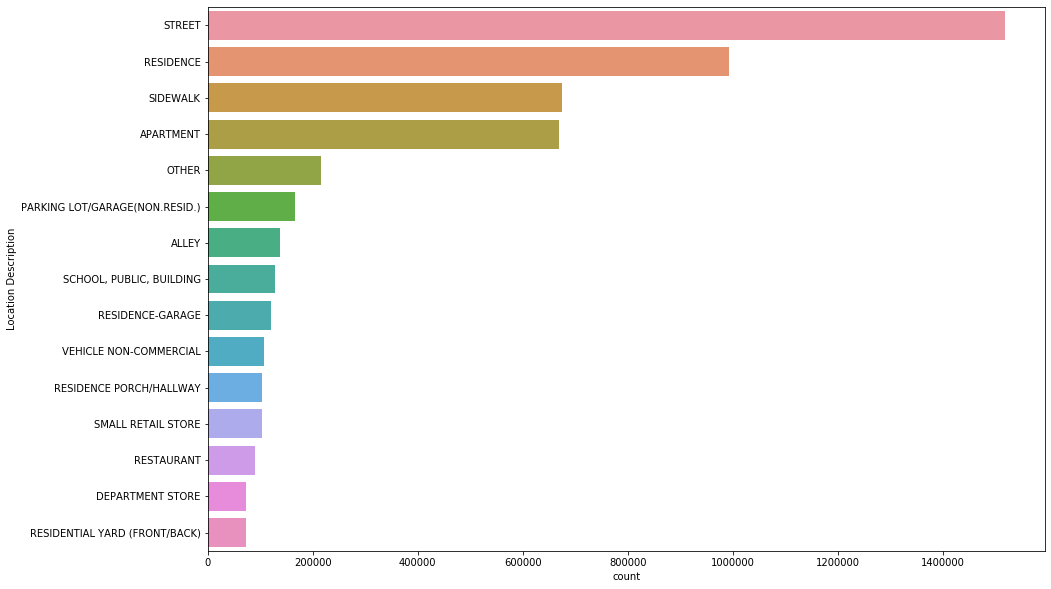

In [13]:
plt.figure(figsize = (15,10))
sns.countplot(y='Location Description', data = chicago_df, order = chicago_df['Location Description'].value_counts().iloc[:15].index)

In [15]:
chicago_df.resample('Y').size()

Date
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'No of crimes')

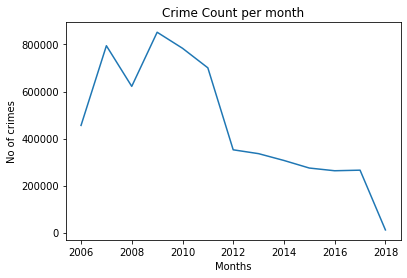

In [16]:
plt.plot(chicago_df.resample('Y').size())
plt.title('Crime Count per month')
plt.xlabel('Months')
plt.ylabel('No of crimes')

Text(0, 0.5, 'No of crimes')

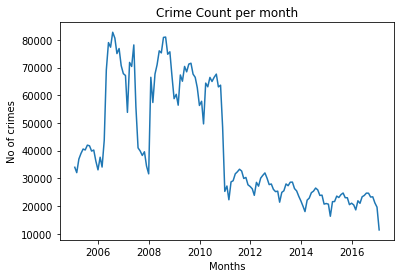

In [17]:
plt.plot(chicago_df.resample('M').size())
plt.title('Crime Count per month')
plt.xlabel('Months')
plt.ylabel('No of crimes')

# The data looks SEASONAL !!!!!!!

Text(0, 0.5, 'No of crimes')

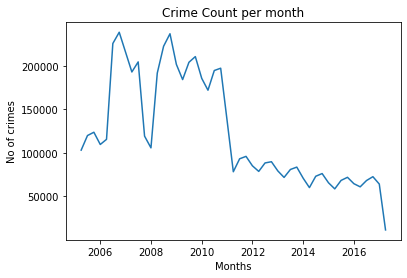

In [18]:
plt.plot(chicago_df.resample('Q').size())
plt.title('Crime Count per month')
plt.xlabel('Months')
plt.ylabel('No of crimes')

# Data Preparation to apply fbprophet

In [22]:
chicago_prophet = chicago_df.resample('M').size().reset_index()
chicago_prophet.columns = ['Date','Crime Count']

In [23]:
chicago_prophet_df_final = chicago_prophet.rename(columns={'Date':'ds','Crime Count':'y'})

In [24]:
chicago_prophet_df_final

,ds,y
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


# Make Predictions using FB Prophet

In [25]:
model = Prophet()
model.fit(chicago_prophet_df_final)
future = model.make_future_dataframe(periods = 365)
forecast = model.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


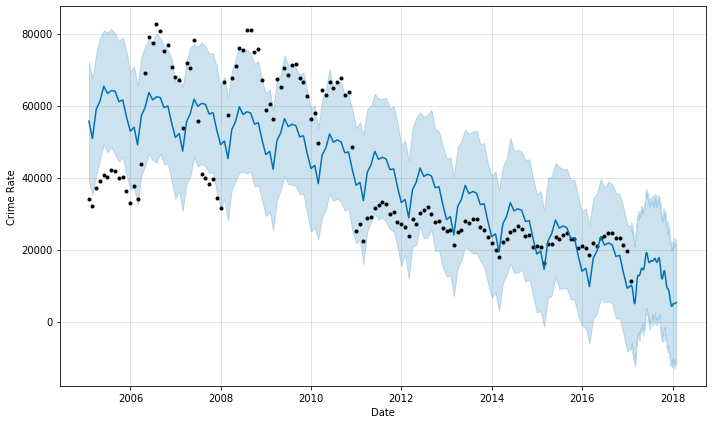

In [27]:
figure = model.plot(forecast, xlabel='Date', ylabel='Crime Rate')

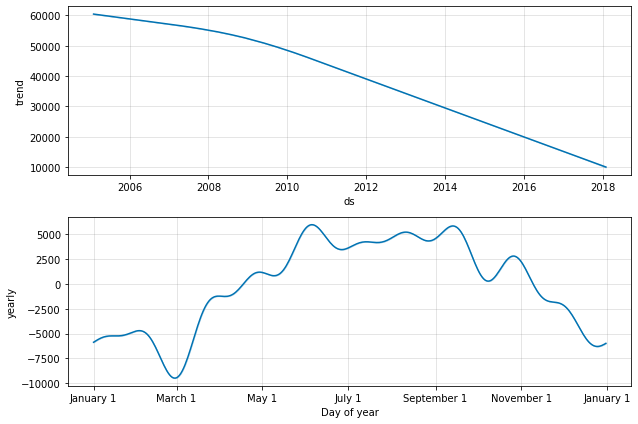

In [28]:
figure = model.plot_components(forecast)